In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import Text, Label, VBox, HBox, Layout, Button, Output
from IPython.display import display, clear_output
import json
from google.colab import drive

drive.mount('/content/drive')
import os
import sys

path_del_progetto = '/content/drive/My Drive/Colab_Notebooks/progetto_tpi'
path_del_file =  "/content/drive/My Drive/Colab_Notebooks/progetto_tpi/Emissioni-gas-serra-per-nazioni-europee.json"

os.chdir(path_del_progetto)

if path_del_progetto not in sys.path:
    sys.path.append(path_del_progetto)

# Assuming these are Python files with functions, import them directly
import funzioni_grafico
import funzioni_dati
import funzioni_partenza
import funzioni_grafico_top5


df = funzioni_partenza.caricaOttieniDf(path_del_file)

output_dati = Output()
output_grafico_top5 = Output()
output_grafico_selezione = Output()
output_tabella = Output()

Mounted at /content/drive


GRAFICO PERSONALIZZATO

funzione di base per la selezione dell'inserimento di nuove nazioni o per la visualizzazione del grafico

In [2]:
# mostra la selezione si/no e la domanda iniziale
def selezioneContinuaInserimento(df):
  with output_grafico_selezione: # mette tutto quello che segue nel "contenitore" output_grafico_selezione
        clear_output() # pulisce l'output

        etichettaSelezione = Label(value="Vuoi inserire un'altra nazione?")

        bottoneSi=Button(
            description="Si",
            layout=Layout(width="80px"),
            style={'button_color': '#90EE90',  'text_color':'#000000','font_color':'#000000'} # Verde chiaro
        )
        bottoneNo=Button(
            description="No (Genera Grafico)",
            layout=Layout(width="180px"),
            style={'button_color': '#FFB6C1',  'text_color':'#000000','font_color':'#000000'} # Rosa chiaro
        )

        # Collegamento delle funzioni
        bottoneSi.on_click(lambda btn : inserimentoNazioni(df, btn))
        bottoneNo.on_click(lambda btn : callbackMostraGrafico(df, btn))

        # Dispone i pulsanti uno accanto all'altro e poi unisce il tutto
        contenitoreBottoni = HBox([bottoneSi, bottoneNo])
        display(VBox([etichettaSelezione, contenitoreBottoni]))

box per l'inseriemnto delle nazioni per il grafico

In [3]:
def inserimentoNazioni(df, b=None):
    # mostra l'input e i bottoni
    with output_grafico_selezione:
        clear_output()

        etichettaInserimento=Label(
            value="Inserisci la nazione:",
            layout=Layout(width='auto')
        )

        inputNazione = Text(
            placeholder='Nazione...',
            layout=Layout(width='200px')
        )

        bottoneInvia = Button(
            description="Invia",
            layout=Layout(width="100px"),
            style={'button_color': 'lightblue', 'text_button':'#000000'}
        )

        # La funzione successiva viene chiamata quando viene cliccato il bottone invia
        bottoneInvia.on_click(lambda btn: callbackInvia(btn, inputNazione, df)) # la lambda serve per mandare due argomenti alla funzione on_click

        # disposizione di tutti i widget
        display(VBox([etichettaInserimento, HBox([inputNazione, bottoneInvia])]))

callback per la selezione iniziale del grafico

In [4]:
def callbackInvia(btn, inputNazione, df):
    nazione_digitata = inputNazione.value

    messaggio_stato = funzioni_grafico.onInviaClick(df, nazione_digitata)
    with output_grafico_selezione:
        clear_output()
        print(messaggio_stato)

    selezioneContinuaInserimento(df)


def callbackMostraGrafico( df, btn):
    figura = funzioni_grafico.generaGrafico(df)

    with output_grafico_selezione:
        clear_output()
        if figura is not None:
            display(figura)


VISUALIZZAZIONE SINGOLA

selezione dei dati per la visualizzazione singola

In [5]:
# inserimento dei dati per il riscontro singolo
def selezioneDati(df,b=None):
    # mostra l'input e i bottoni
    with output_dati:
        clear_output()

        etichetta1=Label(
            value="Inserisci la nazione:",
            layout=Layout(width='auto')
        )

        etichetta2=Label(
            value="Inserisci l'anno:",
            layout=Layout(width='auto')
        )

        inputN = Text(
            placeholder='Nazione...',
            layout=Layout(width='200px')
        )

        inputA = Text(
            placeholder='Anno...',
            layout=Layout(width='200px')
        )

        bottoneCerca = Button(
            description="Cerca dato",
            layout=Layout(width="100px"),
            style={'button_color': 'lightblue', 'text_button':'#000000'}
        )


        # La funzione successiva viene chiamata quando viene cliccato il bottone invia
        bottoneCerca.on_click(lambda btn: rispostaDati(btn, inputN, inputA, df)) # la lambda serve per mandare più argomenti alla funzione on_click

        # disposizione di tutti i widget
        inserimentoN = HBox([etichetta1, inputN])
        inserimentoA = HBox([etichetta2, inputA])
        display(VBox([inserimentoN, inserimentoA, bottoneCerca]))

risposta dati per la ricerca singola

In [6]:
def rispostaDati(btn, inputNazione, inputAnno, df):
 nazione = inputNazione.value
 anno = inputAnno.value

 risposta = funzioni_dati.cercaDati(df, nazione, anno)

 with output_dati:
        clear_output()
        if risposta is not None:
            if risposta is int():
              etichetta_risposta_positiva=Label(
                  value = f'il valore di emissioni nell\'anno {anno} per {nazione} è {risposta} t',
                  layout=Layout(width='auto')
              )
              display(etichetta_risposta_positiva)
            else :
              etichetta_risposta_errore=Label(
                    value = risposta,
                    layout=Layout(width='auto')
                )
              display(etichetta_risposta_errore)
        else :
            etichetta_risposta_negativa=Label(
                value = f'per l\'anno {anno} non sono disoponibili dati',
                layout=Layout(width='auto')
            )
            display(etichetta_risposta_negativa)

        bottoneRetry=Button(
        description="Riprova",
        layout=Layout(width="100px"),
        style={'button_color': 'lightblue', 'text_button':'#000000'}
        )
        bottoneRetry.on_click(lambda btn: selezioneDati(df=df))
        display(bottoneRetry)

OUTPUT GRAFICO

tabella generale per tutti i dati

In [7]:
display(output_tabella)
funzioni_partenza.tabella(df)

Output()

Anno,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
Nazione,,,,,,,,,,,,
Austria,"87,306,053","88,910,405","94,868,012","94,707,605","95,945,893","93,005,881","90,555,416","90,475,208","83,326,747","88,229,060","86,265,218","83,416,944"
Belgio,"142,079,075","140,685,690","141,416,447","142,387,142","138,481,359","135,118,717","130,691,230","133,208,007","120,836,650","128,227,699","118,466,186","114,704,021"
Bulgaria,"67,683,935","64,491,976","69,837,930","68,897,824","69,134,959","69,966,504","74,116,284","72,506,692","62,623,051","65,330,336","71,474,774","66,167,752"
Cipro,"9,539,225","9,781,523","10,217,290","10,342,674","10,421,068","10,619,940","10,889,270","11,054,367","10,762,969","10,457,631","10,237,720","9,736,875"
Croazia,"27,852,923","28,965,578","30,328,882","30,521,360","30,872,636","31,466,445","32,924,404","31,590,874","29,584,348","29,094,067","28,726,510","26,647,271"
Danimarca,"71,775,588","70,940,394","75,752,932","70,163,972","66,050,523","73,868,818","69,393,090","65,980,781","62,837,542","63,255,169","58,458,796","53,641,758"
Estonia,"17,382,754","16,781,251","18,637,795","18,990,114","18,346,217","17,698,872","20,840,508","19,392,258","16,093,520","19,754,706","20,340,331","19,071,061"
Finlandia,"75,266,852","77,461,996","85,422,643","81,655,822","69,604,558","81,084,894","79,653,352","71,708,848","67,366,917","75,819,780","68,627,731","62,660,161"
Francia,"555,776,602","553,707,791","555,776,602","555,227,631","556,875,543","546,740,669","538,566,939","533,610,996","509,533,320","516,621,044","491,378,378","491,378,378"


grafico top 5 nazioni per emissioni

Output()

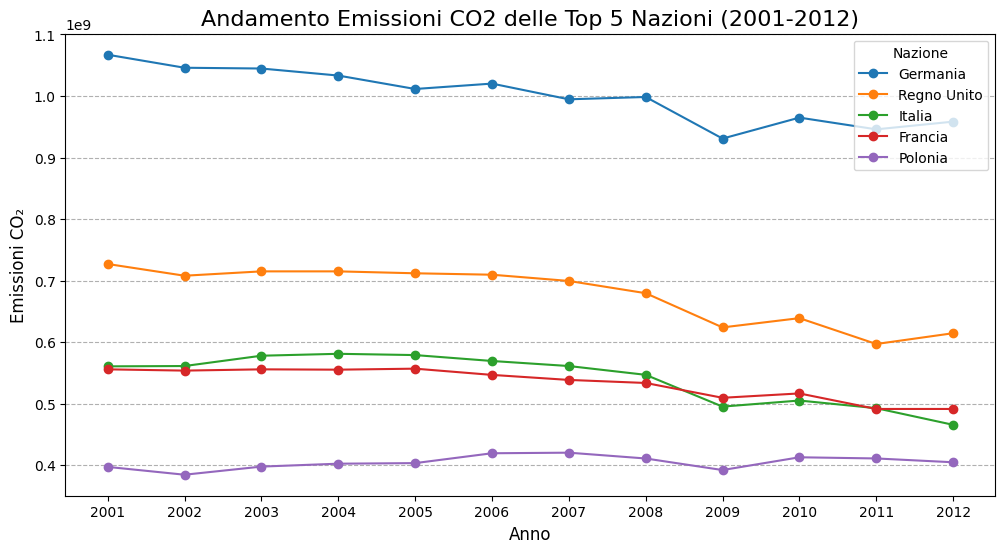

In [8]:
display(output_grafico_top5)
fig = funzioni_grafico_top5.graficoTop5(df)
fig.show()

selezione del grafico desiderato

In [9]:
display(output_grafico_selezione)
clear_output(wait=True)
selezioneContinuaInserimento(df)

Output()

selezione del dato desiderato

In [10]:
display(output_dati)
selezioneDati(df)

Output()